In [ ]:
import pandas as pd

# Load the .pkl file
df_finetuned = pd.read_pickle("finetuned_definition_results.pkl")

# View first few rows
df_finetuned.head(10) # or use display(df.head()) in Jupyter


,word,definition_finetuned,wordnet_definition,definition_similarity_finetuned
0,adaxial,"Define adaxial and apical, and the\ntendon is ...",nearest to or facing toward the axis of an org...,0.245219
1,hoggish,"Define hoggish, and the\n_c_ is the _c_ of the...",resembling swine; coarsely gluttonous or greedy,0.237773
2,adsorptive,"Define adsorptive, and the\nother is a non-ads...",having capacity or tendency to adsorb or cause...,0.361108
3,unreachable,Define unreachable code.\n\nThe following exam...,inaccessibly located or situated,0.238549
4,wolfish,"Define wolfish, and the\n_c_ is the _c_ of the...",resembling or characteristic (or considered ch...,0.601437
5,handy,"Define handy, and you can use it to\nmake a lo...",United States blues musician who transcribed a...,-0.009552
6,crapulous,"Define crapulous, and\nthat is the only way to...",suffering from excessive eating or drinking,0.012554
7,adsorbable,"Define adsorbable, and the\n\n(1) the amount o...",capable of being adsorbed or accumulated on a ...,0.465881
8,abstentious,"Define abstentious, and the\n_cure_ of the _cu...",self-restraining; not indulging an appetite es...,0.063342
9,close,"Define close, and the\n_c_ is the number of th...",the temporal end; the concluding time,0.172520


In [ ]:
import pandas as pd

# Load the .pkl file
df_baseline = pd.read_pickle("results_with_similarity.pkl")

# View first few rows
df_baseline.head(10) # or use display(df.head()) in Jupyter


,word,definition,embedding,wordnet_definition,definition_clean,definition_similarity
0,adaxial,Define adaxial.\n\nThe adaxial is the part of ...,"[-0.19158275425434113, 1.1911396980285645, 0.2...",nearest to or facing toward the axis of an org...,The adaxial is the part of the root that is cl...,0.286537
1,hoggish,Define hoggish.\n\nThe word hoggish is a contr...,"[-0.7336127758026123, 0.6614903807640076, 0.89...",resembling swine; coarsely gluttonous or greedy,The word hoggish is a contraction of the word ...,0.418394
2,adsorptive,Define adsorptive.\n\nAdsorptive is a process ...,"[-0.2344677895307541, 0.1635841578245163, 0.83...",having capacity or tendency to adsorb or cause...,Adsorptive is a process in which a substance i...,0.411917
3,unreachable,Define unreachable.\n\nThe following example s...,"[-0.25693729519844055, 0.12566016614437103, 0....",inaccessibly located or situated,The following example shows how to use the unr...,0.290547
4,wolfish,Define wolfish.\n\nThe word is derived from th...,"[-0.11500249058008194, 0.5398070812225342, 1.0...",resembling or characteristic (or considered ch...,"The word is derived from the Latin word wolf, ...",0.647877
5,handy,Define handy.\n\nThe first thing to do is to m...,"[-0.36915266513824463, 0.4476279020309448, 0.5...",United States blues musician who transcribed a...,The first thing to do is to make sure that the...,-0.008771
6,crapulous,Define crapulous.\n\nI'm not sure what you mea...,"[-0.7203152179718018, 0.1639937311410904, 0.40...",suffering from excessive eating or drinking,"I'm not sure what you mean by ""crapulous"" but ...",0.013861
7,adsorbable,Define adsorbable.\n\nThe first step in the pr...,"[-0.586689293384552, 0.5018137693405151, 0.577...",capable of being adsorbed or accumulated on a ...,The first step in the process is to determine ...,0.368522
8,abstentious,Define abstentious.\n\nThe word abstentia is d...,"[-0.3722144365310669, 0.1436983048915863, 0.78...",self-restraining; not indulging an appetite es...,The word abstentia is derived from the Latin v...,0.215657
9,close,Define close.\n\nThe first thing to do is to g...,"[-0.2758944034576416, 0.7169712781906128, -0.0...",the temporal end; the concluding time,The first thing to do is to get the data from ...,-0.117283


In [ ]:
import pandas as pd

# Load both DataFrames
df_base = pd.read_pickle("results_with_similarity.pkl")
df_finetuned = pd.read_pickle("finetuned_definition_results.pkl")

# Merge on 'word'
df_compare = pd.merge(
    df_base[["word", "definition_clean", "definition_similarity"]],
    df_finetuned[["word", "definition_finetuned", "definition_similarity_finetuned"]],
    on="word",
    how="inner"
)

# Add improvement column
df_compare["similarity_gain"] = df_compare["definition_similarity_finetuned"] - df_compare["definition_similarity"]


In [ ]:
df_compare.sort_values("similarity_gain", ascending=False).head(10)


,word,definition_clean,definition_similarity,definition_finetuned,definition_similarity_finetuned,similarity_gain
80,spartan,The first thing to do is to get the right kind...,-0.066769,"Define spartan, and the\n_s_ is the _s_ of the...",0.519928,0.586697
177,tight,The first thing to do is to make sure that the...,-0.060080,"Define tight, and the\ntension is not too grea...",0.491971,0.552051
121,potted,The first thing to do is to get a good idea of...,0.006500,"Define potted,\nand the other, the\n\n""I am no...",0.441274,0.434774
153,last,The first thing to do is to make sure that the...,-0.172841,"Define last, and the\n_c_ is the number of the...",0.259782,0.432623
145,exuberant,The first thing to do is to get a good idea of...,-0.008734,"Define exuberant, and the\n_tendency_ to be _e...",0.422516,0.431250
126,trackless,The first thing to do is to get a good idea of...,0.093938,"Define trackless, and the\ntrouble is, that th...",0.522368,0.428430
21,torrential,The first thing to do is to get a good idea of...,0.037796,"Define torrential, and the\n_turbulent_ of the...",0.461427,0.423631
20,accurate,The first step is to determine the number of p...,0.094674,"Define accurate, and\n\nThe first thing to do ...",0.489968,0.395293
12,teeming,The first thing to do is to get a good idea of...,0.132351,"Define teeming, and the\n_tend_ of the _tend_ ...",0.518021,0.385670
13,outside,The first thing to do is to get the right kind...,-0.021017,Define outside the\n_trunk_ of the _trunk_ of ...,0.356301,0.377318


In [ ]:
import numpy as np

avg_baseline = df_compare["definition_similarity"].mean()
avg_finetuned = df_compare["definition_similarity_finetuned"].mean()
avg_gain = df_compare["similarity_gain"].mean()
percent_improved = (df_compare["similarity_gain"] > 0).mean() * 100

print(f"Average baseline similarity: {avg_baseline:.4f}")
print(f"Average fine-tuned similarity: {avg_finetuned:.4f}")
print(f"Average similarity gain: {avg_gain:.4f}")
print(f"Words improved: {percent_improved:.2f}%")


Average baseline similarity: 0.1650
Average fine-tuned similarity: 0.2446
Average similarity gain: 0.0796
Words improved: 65.03%


In [ ]:
# Summary
print(df_compare["similarity_gain"].describe())

count    183.000000
mean       0.079606
std        0.165771
min       -0.265593
25%       -0.039271
50%        0.061758
75%        0.181439
max        0.586697
Name: similarity_gain, dtype: float64


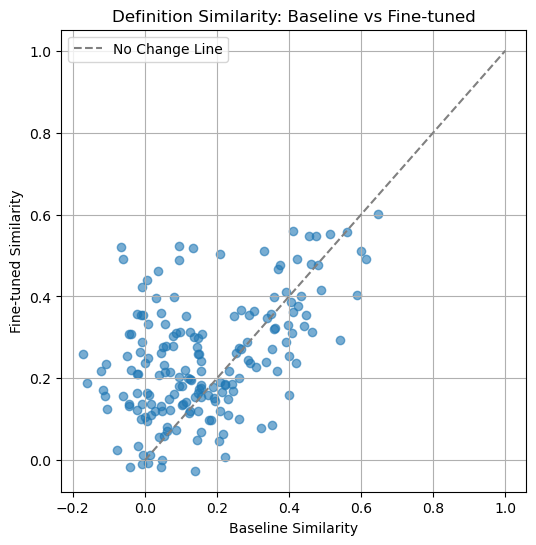

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(
    df_compare["definition_similarity"],
    df_compare["definition_similarity_finetuned"],
    alpha=0.6
)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="No Change Line")
plt.xlabel("Baseline Similarity")
plt.ylabel("Fine-tuned Similarity")
plt.title("Definition Similarity: Baseline vs Fine-tuned")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_compare[
    (df_compare["definition_similarity"] > 0.14) &
    (df_compare["definition_similarity"] < 0.16) &
    (df_compare["definition_similarity_finetuned"] < 0.05)
]


,word,definition_clean,definition_similarity,definition_finetuned,definition_similarity_finetuned,similarity_gain
116,rapacious,"The word is derived from the Latin word rapa, ...",0.145044,"Define rapacious, and\nthe other, the more the...",0.049499,-0.095545


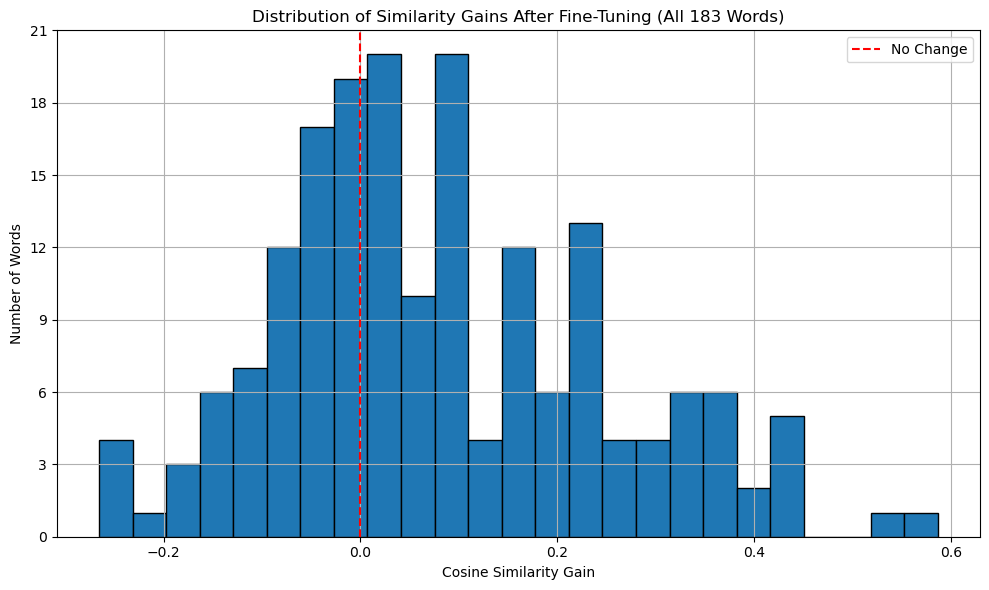

In [ ]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
plt.hist(df_compare["similarity_gain"], bins=25, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label="No Change")
plt.title("Distribution of Similarity Gains After Fine-Tuning (All 183 Words)")
plt.xlabel("Cosine Similarity Gain")
plt.ylabel("Number of Words")
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # <<< THIS LINE
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
len(df_compare["similarity_gain"])

183

In [ ]:
improved_count = (df_compare["similarity_gain"] > 0).sum()
print(f"Number of improved words: {improved_count}")


Number of improved words: 119


In [ ]:
top_improved = df_compare.sort_values("similarity_gain", ascending=False).head(10)
print("Top 10 Improved Words:")
top_improved[["word", "definition_clean", "definition_finetuned", "similarity_gain"]]


Top 10 Improved Words:


,word,definition_clean,definition_finetuned,similarity_gain
80,spartan,The first thing to do is to get the right kind...,"Define spartan, and the\n_s_ is the _s_ of the...",0.586697
177,tight,The first thing to do is to make sure that the...,"Define tight, and the\ntension is not too grea...",0.552051
121,potted,The first thing to do is to get a good idea of...,"Define potted,\nand the other, the\n\n""I am no...",0.434774
153,last,The first thing to do is to make sure that the...,"Define last, and the\n_c_ is the number of the...",0.432623
145,exuberant,The first thing to do is to get a good idea of...,"Define exuberant, and the\n_tendency_ to be _e...",0.431250
126,trackless,The first thing to do is to get a good idea of...,"Define trackless, and the\ntrouble is, that th...",0.428430
21,torrential,The first thing to do is to get a good idea of...,"Define torrential, and the\n_turbulent_ of the...",0.423631
20,accurate,The first step is to determine the number of p...,"Define accurate, and\n\nThe first thing to do ...",0.395293
12,teeming,The first thing to do is to get a good idea of...,"Define teeming, and the\n_tend_ of the _tend_ ...",0.385670
13,outside,The first thing to do is to get the right kind...,Define outside the\n_trunk_ of the _trunk_ of ...,0.377318


In [ ]:
top_worsened = df_compare.sort_values("similarity_gain").head(10)
print("Top 10 Worsened Words:")
top_worsened[["word", "definition_clean", "definition_finetuned", "similarity_gain"]]


Top 10 Worsened Words:


,word,definition_clean,definition_finetuned,similarity_gain
120,unable,"The word ""unable"" is used in the following way...",Define unable to get the\n_C_ of the _C_ of th...,-0.265593
55,conceptional,The conceptional is a concept that is not a co...,"Define conceptional, and\nthe use of the word ...",-0.248837
107,accommodative,The term accommodative is used to describe the...,"Define accommodative, and the\n_c_ is the numb...",-0.242988
38,nonabsorbent,Nonabsorbent: A nonabsorbent material is one t...,"Define nonabsorbent, and the\nother is a nonab...",-0.241437
105,plethoric,The term is used in the sense of a person who ...,"Define plethoric, and the\n_pneumatic_ is a te...",-0.214916
115,adsorbate,The adsorbate is a substance that is adsorbed ...,"Define adsorbate, and the\n\n(1) the amount of...",-0.184100
1,hoggish,The word hoggish is a contraction of the word ...,"Define hoggish, and the\n_c_ is the _c_ of the...",-0.180620
29,complaisant,The word complaisant is derived from the Latin...,"Define complaisant, and the\n_c_ is the _c_ of...",-0.163589
138,swinish,"The word ""swine"" is a word that has been used ...","Define swinish, and the\n_c_ is the number of ...",-0.160942
98,abstemious,The word abstemious is derived from the Latin ...,"Define abstemious, and the\n_cure_ of the _cur...",-0.160061


In [ ]:
unseen_words = ["benevolent", "resilient", "opaque", "zealous", "candid", "intrinsic", "paradox", "perseverance", "catalyst", "empathy"]


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer_ft = AutoTokenizer.from_pretrained("ppo_finetuned_smol_binary")
model_ft = AutoModelForCausalLM.from_pretrained("ppo_finetuned_smol_binary").eval()

def generate_definition(prompt):
    inputs = tokenizer_ft(prompt, return_tensors="pt")
    with torch.no_grad():
        outputs = model_ft.generate(
            **inputs,
            max_new_tokens=30,
            pad_token_id=tokenizer_ft.eos_token_id,
            do_sample=True,
            top_k=50,
            top_p=0.95,
            temperature=0.7,
            repetition_penalty=1.1
        )
    return tokenizer_ft.decode(outputs[0], skip_special_tokens=True)


2025-04-22 21:17:29.091785: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-22 21:17:29.098308: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 21:17:29.111879: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745378249.133289  278340 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745378249.140021  278340 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been regist

In [ ]:
import torch

for word in unseen_words:
    prompt = f"Define {word}"
    definition = generate_definition(prompt)
    print(f"\n🔹 {prompt}")
    print(f"🧠 Generated: {definition}")



🔹 Define benevolent
🧠 Generated: Define benevolent, or the most basic of
the two, is that which has been said in a general way. "I am
entitled to a just

🔹 Define resilient
🧠 Generated: Define resilient, meaning that they have the ability to withstand a variety of stresses. They are able to adapt and recover from various types of stress in order for them

🔹 Define opaque
🧠 Generated: Define opaque_text, as a 4-byte code. The 8-bit value indicates the number of pixels in the color (i.e.,

🔹 Define zealous
🧠 Generated: Define zealous
_I will not be so: I'll not give you my word!_
        - R.

🔹 Define candid
🧠 Generated: Define candid or a friend, but you must be able to understand the person.
* 20% = 1/3 of the total number.

🔹 Define intrinsic
🧠 Generated: Define intrinsic, non-volatile memory is a type of data storage that does not need to be refreshed. This means it can store information even after the power

🔹 Define paradox
🧠 Generated: Define paradoxes, we can use a non-standard